In [1]:
import pandas as pd
import string
import nltk

In [2]:
#import dataset
dataset_columns = ["target", "ids", "date", "flag", "user", "text"]
dataset_encode = "ISO-8859-1"
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = dataset_encode, names = dataset_columns)

In [3]:
data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data.drop(['ids','date','flag','user'],axis = 1,inplace = True)
print('Null values: ', data['text'].isnull().sum())

Null values:  0


In [5]:
data['target'].value_counts()

4    800000
0    800000
Name: target, dtype: int64

In [6]:
#remove punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
data['clean_text']=data['text'].apply(lambda x: remove_punctuation(x))
data.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl Awww thats a b...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...


In [7]:
import re
#remove hyperlink
data['clean_text'] = data['clean_text'].str.replace(r"http\S+", "") 
#remove emoji
data['clean_text'] = data['clean_text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
#convert all words to lowercase
data['clean_text'] = data['clean_text'].str.lower()
data.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...


In [8]:
#tokenization
nltk.download('punkt')
def tokenize(text):
    split=re.split("\W+",text) 
    return split
data['clean_text_tokenize']=data['clean_text'].apply(lambda x: tokenize(x.lower()))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laptop\anaconda3\lib\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
#stopwords
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
data['clean_text_tokenize_stopwords'] = data['clean_text_tokenize'].apply(lambda x: remove_stopwords(x))
data.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laptop\anaconda3\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,target,text,clean_text,clean_text_tokenize,clean_text_tokenize_stopwords
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda ...,"[switchfoot, awww, thats, a, bummer, you, shou...","[switchfoot, awww, thats, bummer, shoulda, got..."
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[upset, cant, update, facebook, texting, might..."
2,0,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,"[kenichan, i, dived, many, times, for, the, ba...","[kenichan, dived, many, times, ball, managed, ..."
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire, ]"
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,"[nationwideclass, no, its, not, behaving, at, ...","[nationwideclass, behaving, im, mad, cant, see, ]"
5,0,@Kwesidei not the whole crew,kwesidei not the whole crew,"[kwesidei, not, the, whole, crew, ]","[kwesidei, whole, crew, ]"
6,0,Need a hug,need a hug,"[need, a, hug, ]","[need, hug, ]"
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time no see yes rains a bit...,"[loltrish, hey, long, time, no, see, yes, rain...","[loltrish, hey, long, time, see, yes, rains, b..."
8,0,@Tatiana_K nope they didn't have it,tatianak nope they didnt have it,"[tatianak, nope, they, didnt, have, it, ]","[tatianak, nope, didnt, ]"
9,0,@twittera que me muera ?,twittera que me muera,"[twittera, que, me, muera, ]","[twittera, que, muera, ]"


In [10]:
# store label and text into new dataframe
new_data = pd.DataFrame()
new_data['text'] = data['clean_text']
new_data['label'] = data['target']
new_data['label'] = new_data['label'].replace(4,1)

In [11]:
# 1 for positive, 0 for negative
print(new_data.head())
print('Label: \n', new_data['label'].value_counts())

                                                text  label
0  switchfoot   awww thats a bummer  you shoulda ...      0
1  is upset that he cant update his facebook by t...      0
2  kenichan i dived many times for the ball manag...      0
3    my whole body feels itchy and like its on fire       0
4  nationwideclass no its not behaving at all im ...      0
Label: 
 1    800000
0    800000
Name: label, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
X = new_data['text']
y = new_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1520000,)
(80000,)
(1520000,)
(80000,)


In [13]:
y_train.value_counts()

0    760001
1    759999
Name: label, dtype: int64

### Modelling

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [15]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [16]:
validation = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, validation)

0.7736

<AxesSubplot:>

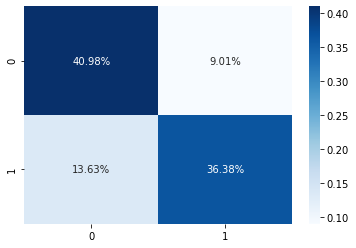

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
cf_matrix = confusion_matrix(y_test, validation)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, validation))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78     39999
           1       0.80      0.73      0.76     40001

    accuracy                           0.77     80000
   macro avg       0.78      0.77      0.77     80000
weighted avg       0.78      0.77      0.77     80000



In [42]:
train = pd.DataFrame()
train['label'] = y_train
train['text'] = X_train

def predict_category(s, train=X_train, model=model):
    pred = model.predict([s])
    return pred[0]

In [47]:
predict_category("i wanna shot myself")

0

In [46]:
predict_category("i love you")

1

In [ ]:
# leave me alone, senpai
"""
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
words =  data['clean_text_tokenize_stopwords']
data['clean_text_stem'] = [stemmer.stem(word) for word in words]   

pas dimasukkin data baru, datanya diproses dulu baru dipredict
hasil keluarannya = True, False
nama fungsinya = pred_depressed
"""